In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler
from matplotlib.patches import Patch
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [2]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

In [3]:
df = pd.read_csv('banklist.csv')

In [4]:
df.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,21-Feb-18
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,21-Feb-18
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,22-Mar-18
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


In [5]:
df['year'] = pd.to_datetime(df['Closing Date'])
df['year'] = df['year'].dt.strftime('%Y')

In [6]:
df.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,21-Feb-18,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,21-Feb-18,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,22-Mar-18,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17,2017


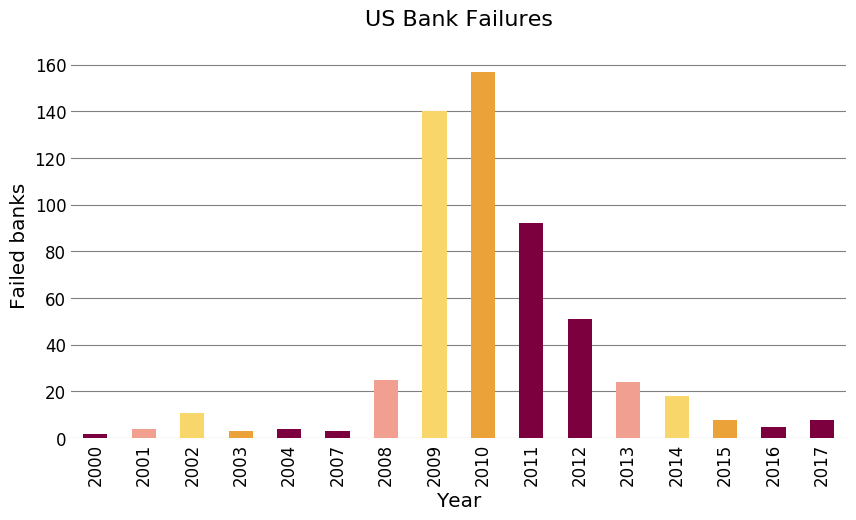

In [249]:
result = df.groupby('year').City.count()
ax = result.plot(kind='bar', figsize=(10, 5))

plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'patch.linewidth': 0.5,
    'figure.facecolor': 'white',
    'font.size': 12.0,
    'axes.facecolor': 'white',
    'axes.edgecolor': 'white',
    'axes.linewidth': '1',
    'axes.grid': True,
    'grid.color': 'gray',
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
    'axes.axisbelow': True,
    'axes.prop_cycle': cycler('color', ['#7c003d', '#f09f90', '#f9d669', '#EBA239']),
    'xtick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.major.size': 0,
    'ytick.minor.size': 0,
    'axes.labelweight': 'medium',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.facecolor': '#FFFFFF',
    'legend.loc': 'upper right',
    'legend.fontsize': 'small'
})
ax.set_xlabel("Year")
ax.set_ylabel("Failed banks")
ax.grid(False, axis='x')
ax.set_title("US Bank Failures", pad=20)
ax.title.set_fontsize(16)

plt.show()

In [8]:
df['fail_date'] = pd.to_datetime(df['Closing Date'], format='%d-%b-%y')

In [9]:
df

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,year,fail_date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,21-Feb-18,2017,2017-12-15
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,21-Feb-18,2017,2017-10-13
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17,2017,2017-05-26
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,22-Mar-18,2017,2017-05-05
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17,2017,2017-04-28
5,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,7-Mar-18,2017,2017-03-03
6,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17,2017,2017-01-27
7,Harvest Community Bank,Pennsville,NJ,34951,First-Citizens Bank & Trust Company,13-Jan-17,18-May-17,2017,2017-01-13
8,Allied Bank,Mulberry,AR,91,Today's Bank,23-Sep-16,25-Sep-17,2016,2016-09-23
9,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,19-Aug-16,1-Jun-17,2016,2016-08-19


In [10]:
df['month'] = pd.to_datetime(df['fail_date'], format='%m')


In [11]:
df_finances = pd.read_csv('bank-financial-info.csv')

In [12]:
#df_finances

In [13]:
# this excludes 28 banks in total
df_full = df.merge(df_finances, left_on='Bank Name', right_on='bank_name')
df_full

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,year,fail_date,month,acquirer,approx_assets,approx_deposit,bank_name,closing_date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,21-Feb-18,2017,2017-12-15,2017-12-15,Royal Savings Bank has agreed to assume the no...,$166.3,$144.0,Washington Federal Bank for Savings,"December 15, 2017"
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,21-Feb-18,2017,2017-10-13,2017-10-13,Conway Bank has agreed to assume all deposits.,$34.2,$29.6,The Farmers and Merchants State Bank of Argonia,"October 13, 2017"
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17,2017,2017-05-26,2017-05-26,"United Fidelity Bank, fsb has agreed to assume...",$34.4,$34.0,Fayette County Bank,"May 26, 2017"
3,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17,2017,2017-04-28,2017-04-28,Whitney Bank has agreed to assume the transact...,"$4,740.0","$3,540.0",First NBC Bank,"April 28, 2017"
4,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,7-Mar-18,2017,2017-03-03,2017-03-03,Cache Valley Bank has agreed to assume all dep...,$68.2,$65.0,Proficio Bank,"March 3, 2017"
5,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17,2017,2017-01-27,2017-01-27,State Bank of Texas has agreed to assume all d...,$361.2,$307.1,Seaway Bank and Trust Company,"January 27, 2017"
6,Harvest Community Bank,Pennsville,NJ,34951,First-Citizens Bank & Trust Company,13-Jan-17,18-May-17,2017,2017-01-13,2017-01-13,First-Citizens Bank & Trust Company has agreed...,$126.4,$123.8,Harvest Community Bank,"January 13, 2017"
7,Allied Bank,Mulberry,AR,91,Today's Bank,23-Sep-16,25-Sep-17,2016,2016-09-23,2016-09-23,Today's Bank has agreed to assume all deposits.,$66.3,$64.7,Allied Bank,"September 23, 2016"
8,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,19-Aug-16,1-Jun-17,2016,2016-08-19,2016-08-19,United Bank has agreed to assume all deposits.,$21.4,$21.1,The Woodbury Banking Company,"August 19, 2016"
9,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,6-May-16,6-Sep-16,2016,2016-05-06,2016-05-06,First-Citizens Bank & Trust Company has agreed...,$103.3,$101.0,First CornerStone Bank,"May 6, 2016"


In [14]:
df_full.approx_assets = df_full.approx_assets.str.replace('$', '', regex=True)
df_full.approx_assets = df_full.approx_assets.str.replace(',', '', regex=True).astype('float')
df_full.approx_deposit = df_full.approx_deposit.str.replace('$', '', regex=True)
df_full.approx_deposit = df_full.approx_deposit.str.replace(',', '', regex=True).astype('float')

In [15]:
df.resample('M', on='fail_date').count().fail_date.plot()
#df.dtypes

#plt.show()

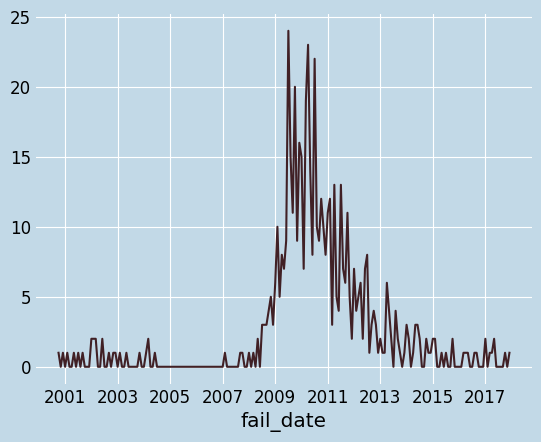

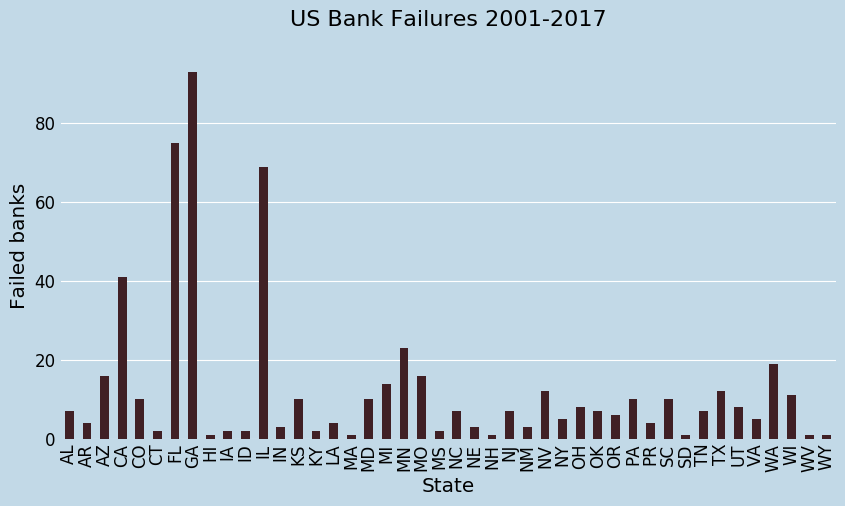

In [16]:
result = df.groupby('ST').count()
ax = result.plot(kind='bar', y='City', figsize=(10,5), color='#402025')

ax.set_xlabel("State")
ax.set_ylabel("Failed banks")
ax.grid(False, axis='x')
ax.set_title("US Bank Failures 2001-2017", pad=20)
ax.title.set_fontsize(16)
ax.legend().set_visible(False)

plt.show()

In [17]:
# revenue lost each year
# size of banks that failed in 2009 vs size of banks that failed in 2017

In [235]:
# select banks that failed after the Great Recession
df_recent = df_full
df_recent = df_recent[(df_recent['fail_date'] > '2013-1-1') & (df_recent['fail_date'] <= '2017-12-31')]
# df_recent

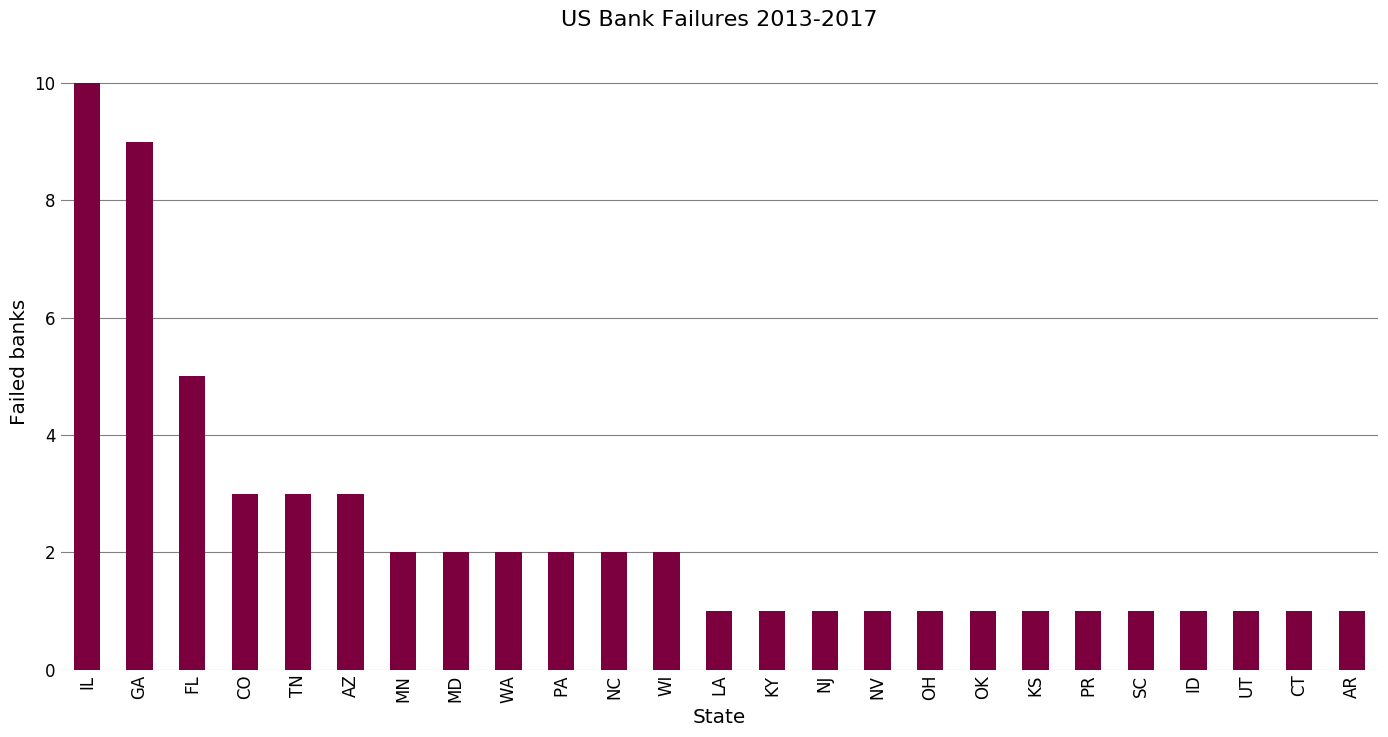

In [261]:
result = df_recent.groupby('ST').count().sort_values(by='City', ascending=False)
ax = result.plot(kind='bar', y='City', figsize=(17,8), color='#7c003d')

ax.set_xlabel("State")
ax.set_ylabel("Failed banks")
ax.grid(False, axis='x')
ax.set_title("US Bank Failures 2013-2017", pad=20)
ax.title.set_fontsize(16)
ax.legend().set_visible(False)

plt.show()

In [224]:
# select banks that failed during Great Recession
df_recession = df_full
df_recession = df_recession[(df_recession['fail_date'] >= '2008-1-1') & (df_recession['fail_date'] <= '2012-12-31')]
# df_recession

In [45]:
# pre-recession info
df_pre_recession = df_full
df_pre_recession = df_pre_recession[(df_pre_recession['fail_date'] < '2008-1-1')]

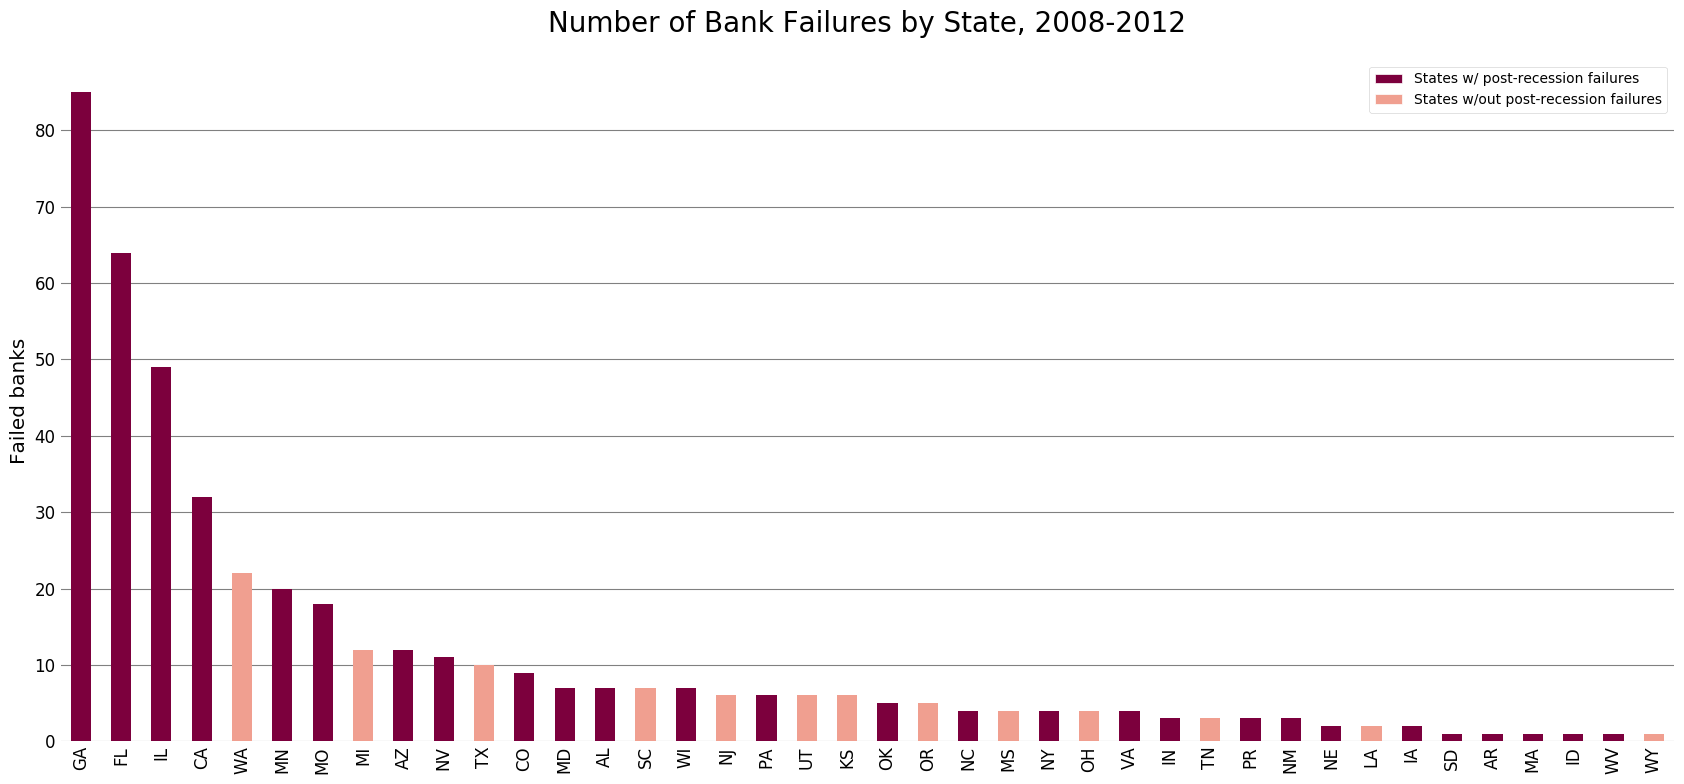

In [286]:
result = df_recession.groupby('ST').count().sort_values(by='City', ascending=False)
ax = result.plot(kind='bar', y='City', figsize=(17,8), color=['#7c003d', '#7c003d', '#7c003d', '#7c003d', '#f09f90', '#7c003d', '#7c003d', '#f09f90', '#7c003d', '#7c003d', '#f09f90', '#7c003d', '#7c003d', '#7c003d', '#f09f90', '#7c003d', '#f09f90', '#7c003d', '#f09f90', '#f09f90', '#7c003d', '#f09f90', '#7c003d', '#f09f90', '#7c003d', '#f09f90', '#7c003d', '#7c003d', '#f09f90', '#7c003d', '#7c003d', '#7c003d', '#f09f90', '#7c003d', '#7c003d', '#7c003d', '#7c003d', '#7c003d', '#7c003d', '#f09f90', '#f09f90'])

# custom legend
legend_elements = [Patch(facecolor='#7c003d', edgecolor='white',
                         label='States w/ post-recession failures'),
                   Patch(facecolor='#f09f90', edgecolor='white',
                         label='States w/out post-recession failures')]

ax.set_xlabel("")
ax.set_ylabel("Failed banks")
ax.grid(False, axis='x')
ax.set_title("Number of Bank Failures by State, 2008-2012", pad=20)
ax.title.set_fontsize(20)
ax.legend(handles=legend_elements)

plt.tight_layout()
plt.savefig("recession-bank-failures.pdf", facecolor=plt.gcf().get_facecolor())

plt.show()

In [22]:
totals = {}
totals['year'] = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
totals['bank_failures'] = [4, 11, 3, 4, 0, 0, 3, 25, 135, 157, 92, 51, 24, 18, 8, 5, 6]
totals['assets'] = [2358.6, 2705.4, 1045.2, 163.1, 0, 0, 2602.5, 373588.78, 170867, 96514, 36012.2, 12055.8, 6101.7, 3088.4, 6727.5, 278.8, 6530.7]

In [23]:
df_totals=pd.DataFrame(totals)
df_totals

,year,bank_failures,assets
0,2001,4,2358.60
1,2002,11,2705.40
2,2003,3,1045.20
3,2004,4,163.10
4,2005,0,0.00
5,2006,0,0.00
6,2007,3,2602.50
7,2008,25,373588.78
8,2009,135,170867.00
9,2010,157,96514.00


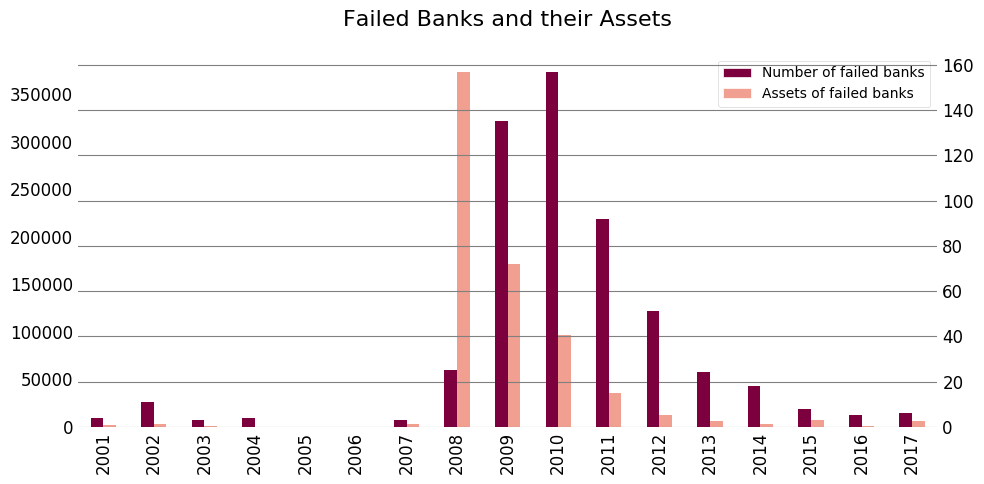

In [285]:
#df_totals.plot(x='year', y='assets', label="Dollars lost (millions)", legend=True)
results = df_totals
ax = results.plot(x='year', secondary_y='bank_failures', label="fails", legend=True, figsize=(10,5), kind='bar')

# custom legend
legend_elements = [Patch(facecolor='#7c003d', edgecolor='white',
                         label='Number of failed banks'),
                   Patch(facecolor='#f09f90', edgecolor='white',
                         label='Assets of failed banks')]

ax.set_axisbelow(True)
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid(False, axis='x')
ax.set_title("Failed Banks and their Assets", pad=20)
ax.title.set_fontsize(16)
ax.legend(handles=legend_elements)

plt.tight_layout()
plt.savefig("banks-and-assets.pdf", facecolor=plt.gcf().get_facecolor())

In [26]:
df_full_recession = df_full[(df_full['fail_date'] > '2008-1-1') & (df_recession['fail_date'] <= '2012-12-31')]
df_full_recession

/Users/Veronica/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,year,fail_date,month,acquirer,approx_assets,approx_deposit,bank_name,closing_date
63,Frontier Bank,Everett,WA,22710,"Union Bank, N.A.",30-Apr-10,15-Jan-13,2010,2010-04-30,2010-04-30,"Bank of Southern California, N.A. has agreed t...",86.40,82.10,Frontier Bank,"November 7, 2014"
64,Covenant Bank,Chicago,IL,22476,Liberty Bank and Trust Company,15-Feb-13,21-Sep-15,2013,2013-02-15,2013-02-15,Liberty Bank and Trust Company has agreed to a...,58.40,54.20,Covenant Bank,"February 15, 2013"
65,1st Regents Bank,Andover,MN,57157,First Minnesota Bank,18-Jan-13,12-Jul-16,2013,2013-01-18,2013-01-18,First Minnesota Bank has agreed to assume all ...,50.20,49.10,1st Regents Bank,"January 18, 2013"
66,Westside Community Bank,University Place,WA,33997,Sunwest Bank,11-Jan-13,8-Aug-16,2013,2013-01-11,2013-01-11,Sunwest Bank has agreed to assume all deposits.,97.70,96.50,Westside Community Bank,"January 11, 2013"
67,Community Bank of the Ozarks,Sunrise Beach,MO,27331,Bank of Sullivan,14-Dec-12,4-Apr-14,2012,2012-12-14,2012-12-14,Bank of Sullivan has agreed to assume all depo...,42.80,41.90,Community Bank of the Ozarks,"December 14, 2012"
68,Hometown Community Bank,Braselton,GA,57928,"CertusBank, National Association",16-Nov-12,6-Oct-17,2012,2012-11-16,2012-11-16,"CertusBank, National Association has agreed to...",124.60,108.90,Hometown Community Bank,"November 16, 2012"
69,Citizens First National Bank,Princeton,IL,3731,Heartland Bank and Trust Company,2-Nov-12,13-Feb-18,2012,2012-11-02,2012-11-02,Heartland Bank and Trust Company has agreed to...,924.00,869.40,Citizens First National Bank,"November 2, 2012"
70,Heritage Bank of Florida,Lutz,FL,35009,Centennial Bank,2-Nov-12,21-Mar-14,2012,2012-11-02,2012-11-02,Centennial Bank has agreed to assume all depos...,225.50,223.30,Heritage Bank of Florida,"November 2, 2012"
71,NOVA Bank,Berwyn,PA,27148,No Acquirer,26-Oct-12,24-Jan-13,2012,2012-10-26,2012-10-26,The FDIC has approved the payout of the insure...,483.00,432.20,NOVA Bank,"October 26, 2012"
72,Excel Bank,Sedalia,MO,19189,Simmons First National Bank,19-Oct-12,22-Oct-13,2012,2012-10-19,2012-10-19,Simmons First National Bank has agreed to assu...,200.60,187.40,Excel Bank,"October 19, 2012"


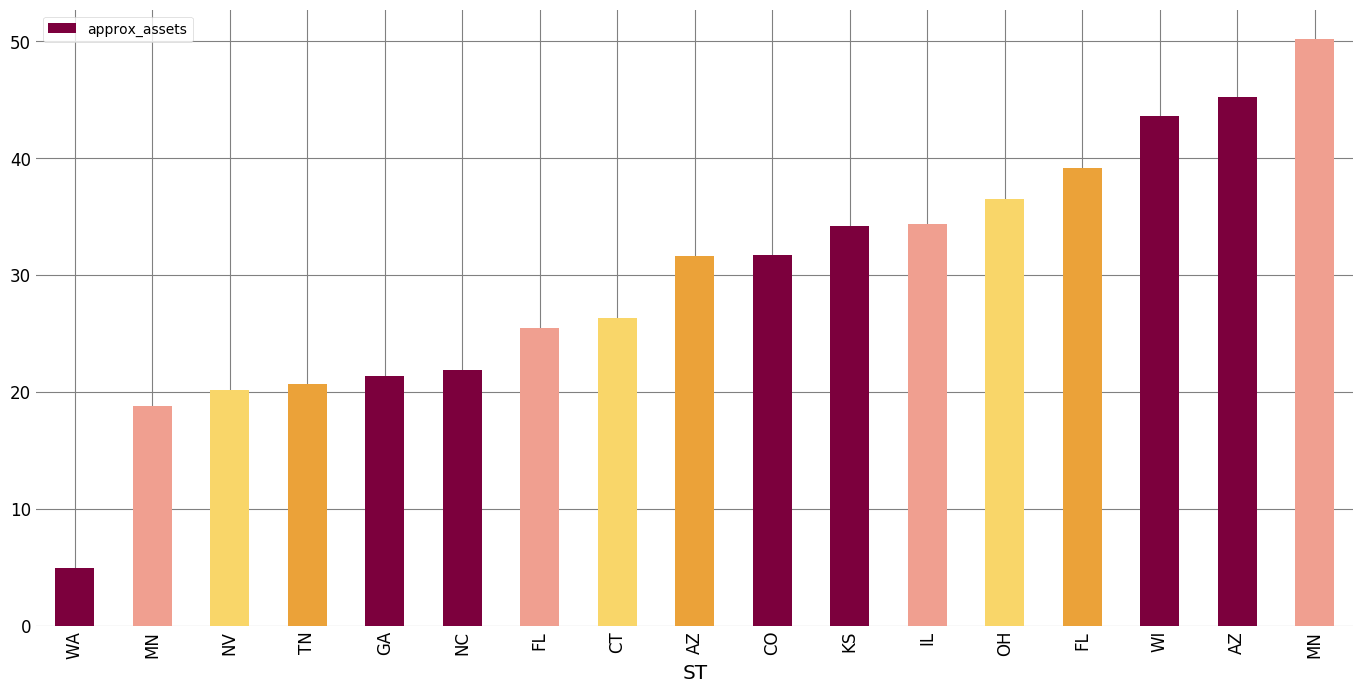

In [266]:
result = df_recent.sort_values(by='approx_assets').head(17)
ax = result.plot(x='ST', y='approx_assets', figsize=(17,8), kind='bar', stacked=True)

plt.show()

In [155]:
df_recent

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,year,fail_date,month,acquirer,approx_assets,approx_deposit,bank_name,closing_date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,21-Feb-18,2017,2017-12-15,2017-12-15,Royal Savings Bank has agreed to assume the no...,166.3,144.0,Washington Federal Bank for Savings,"December 15, 2017"
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,21-Feb-18,2017,2017-10-13,2017-10-13,Conway Bank has agreed to assume all deposits.,34.2,29.6,The Farmers and Merchants State Bank of Argonia,"October 13, 2017"
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17,2017,2017-05-26,2017-05-26,"United Fidelity Bank, fsb has agreed to assume...",34.4,34.0,Fayette County Bank,"May 26, 2017"
3,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17,2017,2017-04-28,2017-04-28,Whitney Bank has agreed to assume the transact...,4740.0,3540.0,First NBC Bank,"April 28, 2017"
4,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,7-Mar-18,2017,2017-03-03,2017-03-03,Cache Valley Bank has agreed to assume all dep...,68.2,65.0,Proficio Bank,"March 3, 2017"
5,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17,2017,2017-01-27,2017-01-27,State Bank of Texas has agreed to assume all d...,361.2,307.1,Seaway Bank and Trust Company,"January 27, 2017"
6,Harvest Community Bank,Pennsville,NJ,34951,First-Citizens Bank & Trust Company,13-Jan-17,18-May-17,2017,2017-01-13,2017-01-13,First-Citizens Bank & Trust Company has agreed...,126.4,123.8,Harvest Community Bank,"January 13, 2017"
7,Allied Bank,Mulberry,AR,91,Today's Bank,23-Sep-16,25-Sep-17,2016,2016-09-23,2016-09-23,Today's Bank has agreed to assume all deposits.,66.3,64.7,Allied Bank,"September 23, 2016"
8,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,19-Aug-16,1-Jun-17,2016,2016-08-19,2016-08-19,United Bank has agreed to assume all deposits.,21.4,21.1,The Woodbury Banking Company,"August 19, 2016"
9,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,6-May-16,6-Sep-16,2016,2016-05-06,2016-05-06,First-Citizens Bank & Trust Company has agreed...,103.3,101.0,First CornerStone Bank,"May 6, 2016"


In [242]:
#get top 10 states by failed bank count
# doing this manually because I just can't figure out how to sort the counts
df_top_recent = df_recent[df_recent.ST.str.contains("IL") | df_recent.ST.str.contains("GA") | df_recent.ST.str.contains("FL") | df_recent.ST.str.contains(".WI.") | df_recent.ST.str.contains("TN") | df_recent.ST.str.contains("AZ")]
df_top_recent


,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,year,fail_date,month,acquirer,approx_assets,approx_deposit,bank_name,closing_date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,21-Feb-18,2017,2017-12-15,2017-12-15,Royal Savings Bank has agreed to assume the no...,166.3,144.0,Washington Federal Bank for Savings,"December 15, 2017"
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17,2017,2017-05-26,2017-05-26,"United Fidelity Bank, fsb has agreed to assume...",34.4,34.0,Fayette County Bank,"May 26, 2017"
5,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17,2017,2017-01-27,2017-01-27,State Bank of Texas has agreed to assume all d...,361.2,307.1,Seaway Bank and Trust Company,"January 27, 2017"
8,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,19-Aug-16,1-Jun-17,2016,2016-08-19,2016-08-19,United Bank has agreed to assume all deposits.,21.4,21.1,The Woodbury Banking Company,"August 19, 2016"
10,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,29-Apr-16,6-Sep-16,2016,2016-04-29,2016-04-29,The Bank of Fayette County has agreed to assum...,20.7,20.3,Trust Company Bank,"April 29, 2016"
13,The Bank of Georgia,Peachtree City,GA,35259,Fidelity Bank,2-Oct-15,9-Jul-18,2015,2015-10-02,2015-10-02,Fidelity Bank has agreed to assume all deposits.,294.2,280.7,The Bank of Georgia,"October 2, 2015"
23,Edgebrook Bank,Chicago,IL,57772,Republic Bank of Chicago,8-May-15,12-Jul-16,2015,2015-05-08,2015-05-08,Republic Bank of Chicago has agreed to assume ...,90.0,90.0,Edgebrook Bank,"May 8, 2015"
25,Capitol City Bank & Trust Company,Atlanta,GA,33938,First-Citizens Bank & Trust Company,13-Feb-15,21-Apr-15,2015,2015-02-13,2015-02-13,First-Citizens Bank & Trust Company has agreed...,272.3,262.7,Capitol City Bank & Trust Company,"February 13, 2015"
26,Highland Community Bank,Chicago,IL,20290,"United Fidelity Bank, fsb",23-Jan-15,15-Nov-17,2015,2015-01-23,2015-01-23,"United Fidelity Bank, fsb has agreed to assume...",54.7,53.5,Highland Community Bank,"January 23, 2015"
28,The National Republic Bank of Chicago,Chicago,IL,916,State Bank of Texas,24-Oct-14,6-Jan-16,2014,2014-10-24,2014-10-24,State Bank of Texas has agreed to assume all d...,954.4,915.3,The National Republic Bank of Chicago,"October 24, 2014"


'GA'

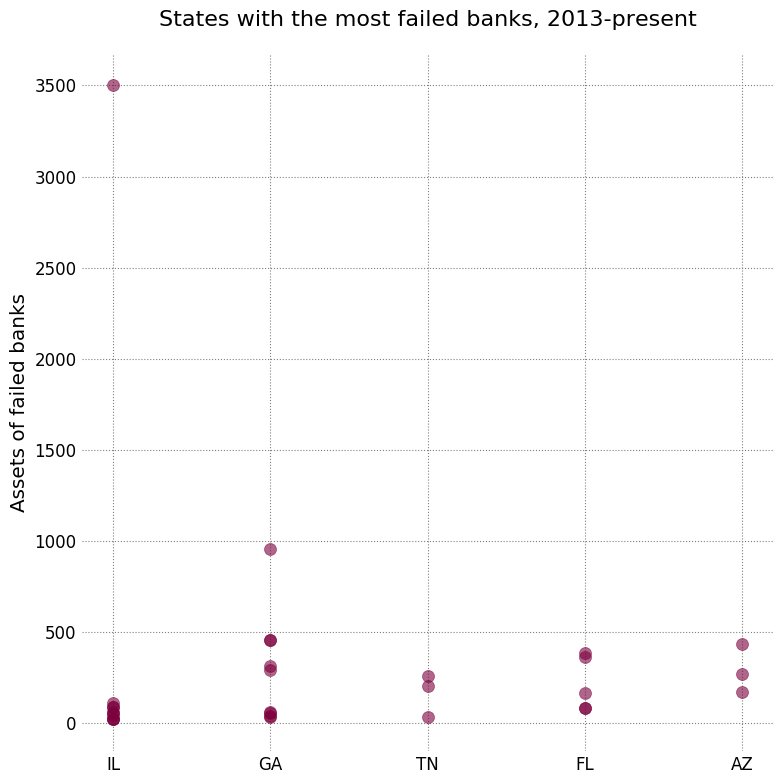

In [271]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(df_top_recent.ST, df_top_recent.approx_assets.sort_values(), s=75, alpha=0.6, color='#7c003d')

ax.set_xlabel("")
ax.set_ylabel("Assets of failed banks")
ax.grid(linestyle='dotted')
ax.set_title("States with the most failed banks, 2013-present", pad=20)
ax.title.set_fontsize(16)

plt.tight_layout()
plt.savefig("post-recession-scatter.pdf", facecolor=plt.gcf().get_facecolor())

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(df_recent.approx_assets, df_recent.ST, s=20, alpha=0.5)

In [73]:
df_recent.approx_assets.sum()

23182.200000000004

In [74]:
df_pre_recession.approx_assets.sum()

4895.5

In [225]:
df_recession.approx_assets.sum()

320952.28

In [97]:
round(df_recent.sort_values(by='approx_assets').head(17).groupby('ST').approx_assets.sum())

ST
AZ    77.0
CO    32.0
CT    26.0
FL    65.0
GA    21.0
IL    34.0
KS    34.0
MN    69.0
NC    22.0
NV    20.0
OH    36.0
TN    21.0
WA     5.0
WI    44.0
Name: approx_assets, dtype: float64

/Users/Veronica/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


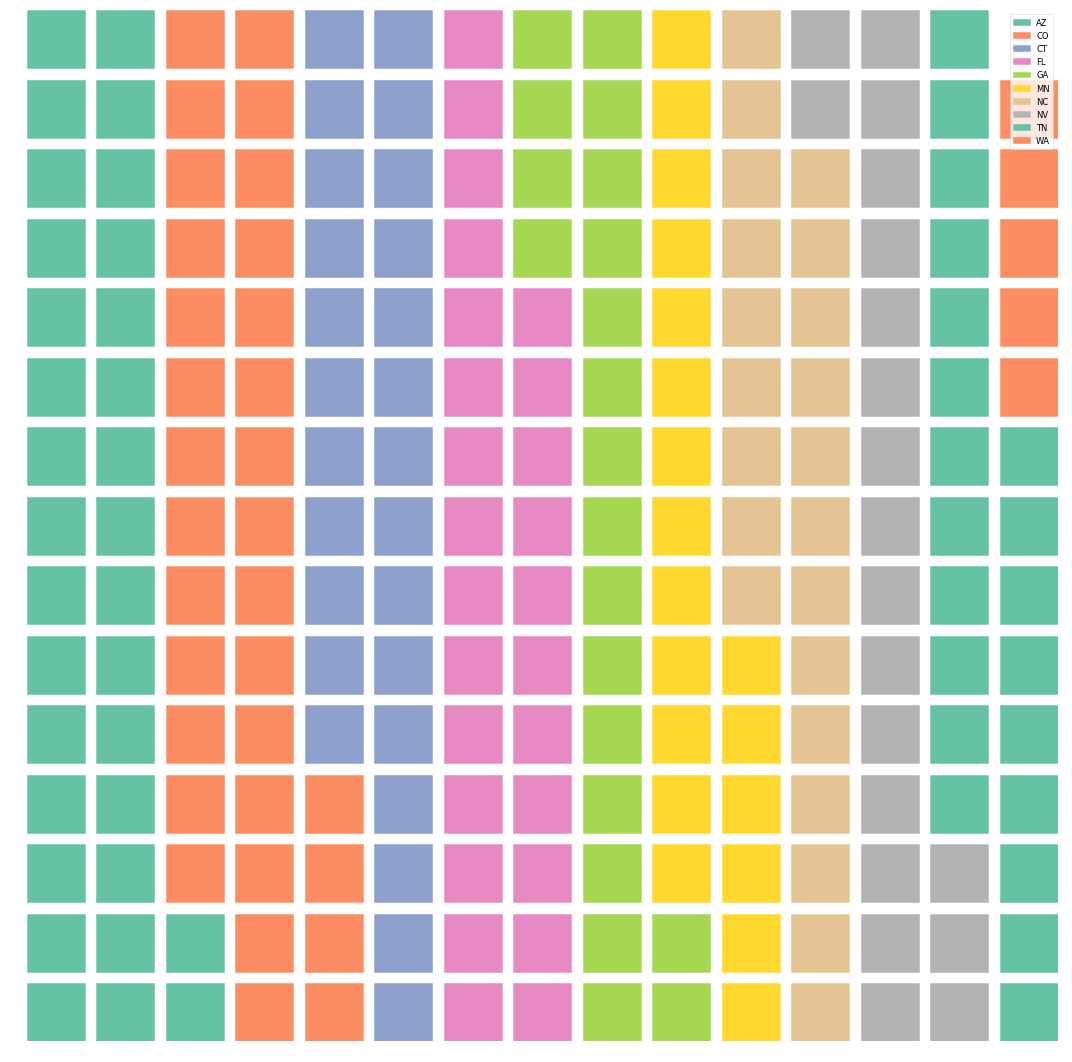

In [102]:
#
recent_sums = round(df_recent.sort_values(by='approx_assets').head(10).groupby('ST').approx_assets.sum())

fig = plt.figure(
    FigureClass=Waffle, 
    rows=15, 
    values=list(recent_sums.values),
    labels=list(recent_sums.index),
    figsize=(15,15)
)

In [227]:
# quick waffle chart for value of bank failures before and after the recession
totals = pd.DataFrame({
    'time_period': ['pre_recession', 'recession', 'post_recession'],
    'failed_bank_assets': [4.8955, 320.95228, 23.182200000000004]
})
totals

,time_period,failed_bank_assets
0,pre_recession,4.89550
1,recession,320.95228
2,post_recession,23.18220


/Users/Veronica/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


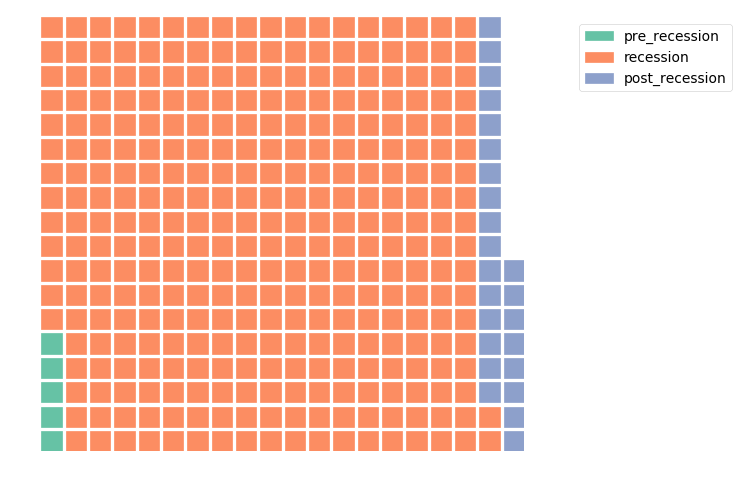

In [272]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=18,
    values=totals.failed_bank_assets,
    labels=list(totals.time_period),
    figsize=(10, 5),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)

plt.tight_layout()
plt.savefig("bank-failure-waffle.pdf", facecolor=plt.gcf().get_facecolor())